Aruco Marker Generation

Generated ArUco marker (ID: 40) saved as aruco_marker_id_40.png.


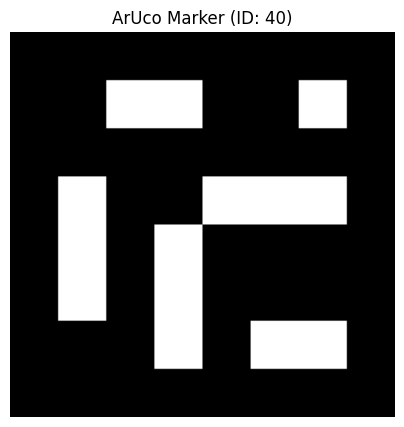

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate an ArUco marker
def generate_aruco_marker(marker_id, marker_size, dictionary_type):
    # Get the predefined dictionary
    dictionary = cv.aruco.getPredefinedDictionary(dictionary_type)

    # Generate the ArUco marker
    marker_image = np.zeros((marker_size, marker_size), dtype=np.uint8)
    cv.aruco.generateImageMarker(dictionary, marker_id, marker_size, marker_image, borderBits=1)

    # Save the generated marker
    output_file = f"aruco_marker_id_{marker_id}.png"
    cv.imwrite(output_file, marker_image)
    print(f"Generated ArUco marker (ID: {marker_id}) saved as {output_file}.")

    # Display the image in the notebook
    plt.figure(figsize=(5, 5))
    plt.imshow(marker_image, cmap='gray')
    plt.title(f"ArUco Marker (ID: {marker_id})")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    return output_file

# Step 2: Example usage
if __name__ == "__main__":
    marker_id = 40  # Marker ID
    marker_size = 200  # Marker size in pixels
    dictionary_type = cv.aruco.DICT_6X6_250  # Dictionary type

    # Generate and display the ArUco marker
    generate_aruco_marker(marker_id, marker_size, dictionary_type)


Aruco Pose Detection

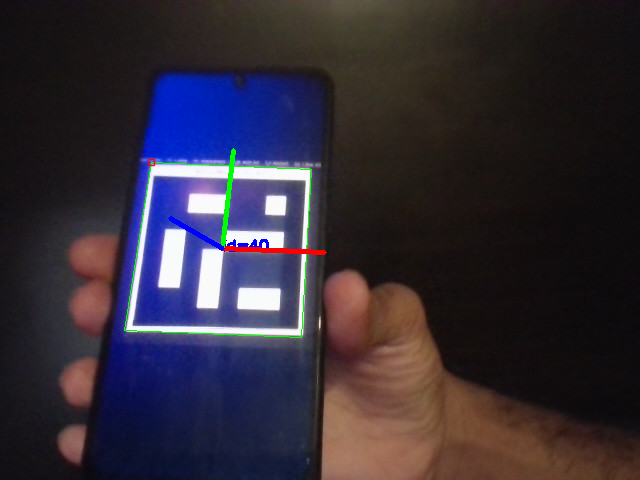

Stopped by user.


In [1]:
import cv2
import numpy as np
from IPython.display import display, clear_output
import PIL.Image
from IPython.display import Image as IPImage

def my_estimatePoseSingleMarkers(corners, marker_size, mtx, distortion):
    marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, -marker_size / 2, 0],
                              [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)
    rvecs, tvecs = [], []
    for c in corners:
        _, R, t = cv2.solvePnP(marker_points, c, mtx, distortion, False, cv2.SOLVEPNP_IPPE_SQUARE)
        rvecs.append(R)
        tvecs.append(t)
    return rvecs, tvecs

def detect_aruco_with_custom_pose(dictionary_type, camera_matrix, distortion_coefficients):
    dictionary = cv2.aruco.getPredefinedDictionary(dictionary_type)
    parameters = cv2.aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(dictionary, parameters)

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Unable to access the camera.")
        return

    marker_size = 0.05  # Marker size in meters

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Unable to capture frame.")
                break

            corners, ids, _ = detector.detectMarkers(frame)
            if ids is not None:
                frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
                rvecs, tvecs = my_estimatePoseSingleMarkers(corners, marker_size, camera_matrix, distortion_coefficients)

                for i in range(len(rvecs)):
                    cv2.drawFrameAxes(frame, camera_matrix, distortion_coefficients, rvecs[i], tvecs[i], 0.03)
                    print(f"Marker ID: {ids[i][0]}")  # Display marker ID
                    print(f"Rotation Vector: {rvecs[i].flatten()}")
                    print(f"Translation Vector: {tvecs[i].flatten()}")

            # Convert frame to PIL Image format
            pil_img = PIL.Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Display frame in Jupyter Notebook
            clear_output(wait=True)
            display(pil_img)

            # Break on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    except KeyboardInterrupt:
        print("Stopped by user.")
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Example usage
if __name__ == "__main__":
    dictionary_type = cv2.aruco.DICT_6X6_250
    camera_matrix = np.array([[1000, 0, 640], 
                               [0, 1000, 360], 
                               [0, 0, 1]], dtype=np.float32)

    distortion_coefficients = np.array([0, 0, 0, 0, 0], dtype=np.float32)

    detect_aruco_with_custom_pose(dictionary_type, camera_matrix, distortion_coefficients)
